# **Project 3 - Explainable AI with SHAP**


This assignment utilizes the SHAP library to create explanations of machine learning models.

Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples.

Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments.

Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.





*STUDENT ANSWER:*

SHAP is useful because it helps make complex ML models more transparent and understandable. SHAP is maybe a bit better than LIME since its completely model-agnostic, making it a go-to choice for any given ML model. It provides explanations by assigning importance scores to each feature in a model, indicating how much each feature contributes to a spesific prediction. 

*Usecases*:
* Healthcare Diagnostics: SHAP can help doctors understand which factors (e.g., blood sugar, age) contribute most to a model’s diagnosis, making AI predictions transparent and easier to explain to patients.
* Financial Risk Assessment: SHAP shows which factors (e.g., income, credit history) influence a credit risk assessment, helping financial institutions comply with regulations and justify decisions.	
* Predictive Maintenance: SHAP identifies key factors (e.g., temperature, vibration) that predict equipment failure, allowing engineers to focus on specific maintenance needs and prevent breakdowns.

## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]** Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

In [2]:
# It is recommended to use this version of SHAP:
!pip install shap==0.46.0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data preparation

In [4]:
# Lets prepare the data: have a look at the outputs.
data, target = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# We have 8 features and a single target value (the value of the house).
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


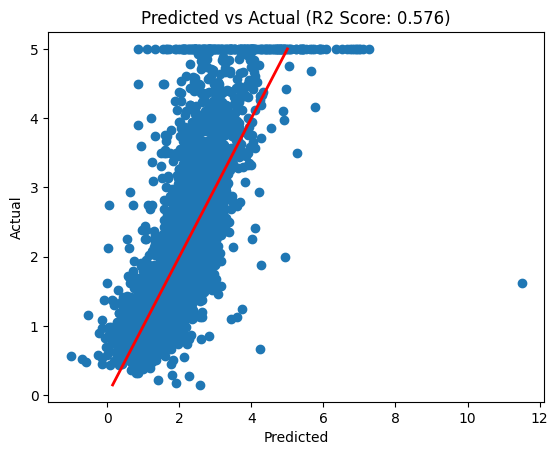

In [5]:
# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot predicted vs actual values
score = r2_score(y_test, linear_model.predict(X_test))
print(f"R2 Score: {score:.3f}")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.scatter(linear_model.predict(X_test), y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Coefficients

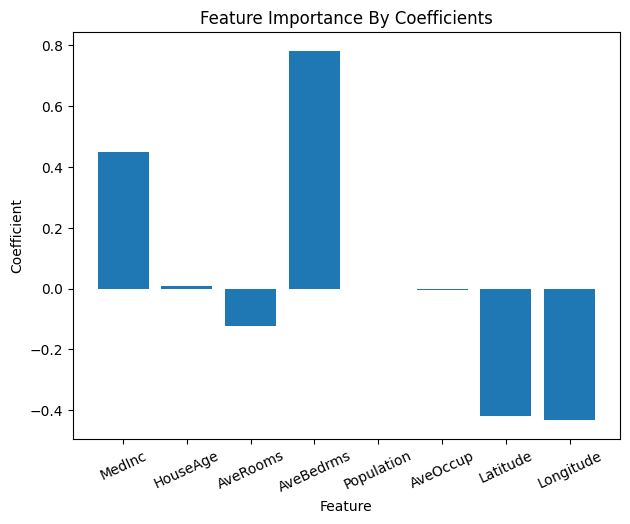

In [6]:
# Plot the coefficients of the linear model with feature names
# For linear models, the coefficients is an easy way to interpret feature importance
plt.bar(data.columns, linear_model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.title("Feature Importance By Coefficients")
plt.xticks(rotation=25)
plt.show()

### SHAP feature importance

ExactExplainer explainer: 4129it [00:18, 124.38it/s]                          


SHAP values shape: (4128, 8)


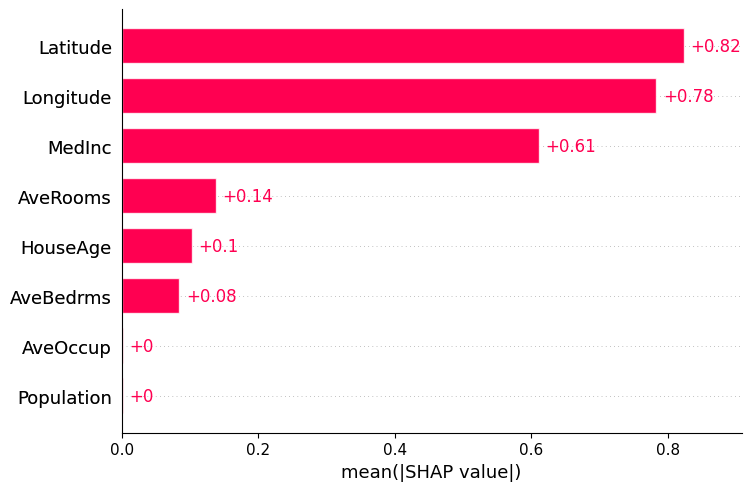

In [7]:
# Now we use SHAP for feature importance
# We use the training dataset as background data for SHAP
explainer = shap.Explainer(linear_model.predict, X_train)
explain_data = X_test
# We calculate the shap_values of the test data
shap_values = explainer(explain_data)
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

          MedInc   HouseAge   AveRooms  AveBedrms   Population   AveOccup  \
count  10.000000  10.000000  10.000000  10.000000    10.000000  10.000000   
mean    4.996080  46.800000   5.736540   1.044793   976.300000   2.245278   
std     2.243359  10.064238   1.236907   0.057216   648.036702   0.299478   
min     2.080400  21.000000   4.294118   0.951362   322.000000   1.788253   
25%     3.667125  44.500000   4.831122   0.998599   511.500000   2.114483   
50%     3.941500  52.000000   5.393970   1.067442   829.500000   2.156083   
75%     6.853825  52.000000   6.270924   1.079172  1193.750000   2.456326   
max     8.325200  52.000000   8.288136   1.117647  2401.000000   2.802260   

        Latitude   Longitude  
count  10.000000   10.000000  
mean   37.850000 -122.245000  
std     0.012472    0.011785  
min    37.840000 -122.260000  
25%    37.840000 -122.250000  
50%    37.850000 -122.250000  
75%    37.850000 -122.242500  
max    37.880000 -122.220000  
[[<Axes: title={'center': '

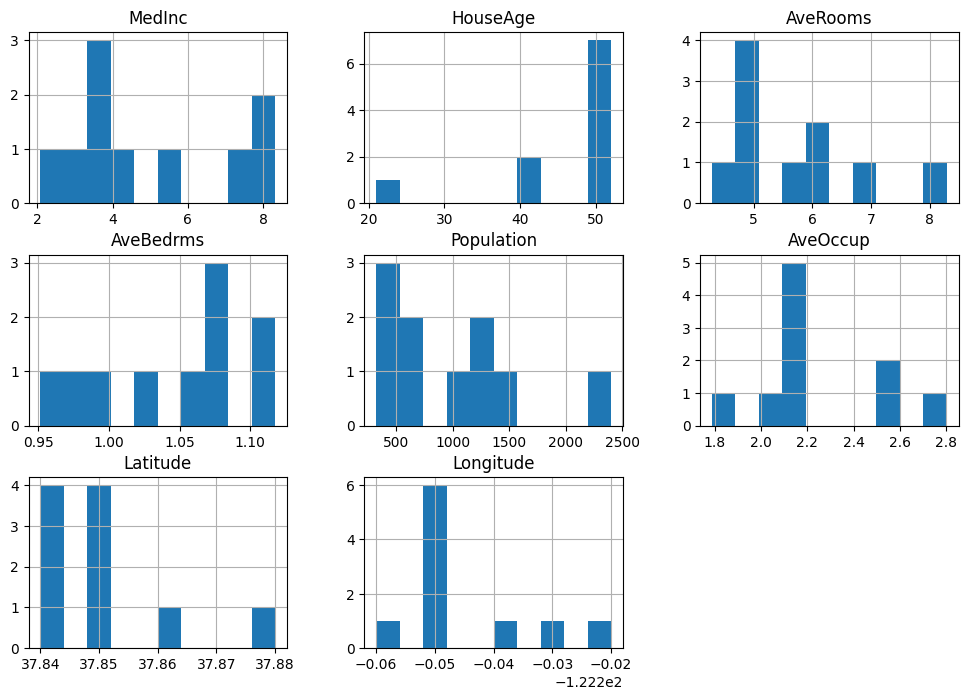

In [8]:
# TODO: WRITE YOUR CODE/ANSWER HERE
print(data.head(10).describe())
print(data.head(10).hist(figsize=(12,8)))

It is because of AveBedrms low variability in contrast with some of the other features. The .hist and .describe shows that AveBedrms has a mean of around 1.06 and a very narrow range (from ca 0.95 to 1.11). While the model assigns it a high weight based on a strong linear relationship with the target, the minimal variation across samples means it doesn't significantly impact individual predictions. SHAP values capture this by reflecting the actual contribution of each feature to predictions, taking into account both the feature's effect and its variability. Therefore, AveBedrms appears less important in SHAP analysis because its lack of variability limits its influence on the model's outputs, despite a high coefficient indicating importance in a linear sense.

### **[STORY]** Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


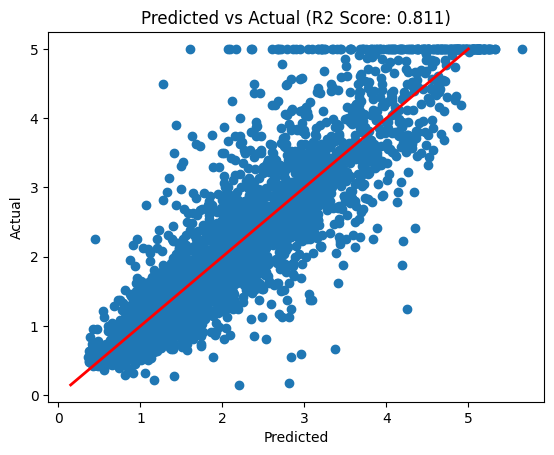

In [9]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train)

# Lets see if it performs better than the linear model
y_pred = boosting_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.show()

In [10]:
# We use a SHAP explainer to generate SHAP values for the boosting model.
# We provide the training dataset as background data (reference values).
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values = explainer(explain_data)

ExactExplainer explainer: 4129it [02:30, 25.60it/s]                          


### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:

* 3.1 How does your selected plot visualize shap_values?

* 3.2 Which features are important and which are not?

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

**STUDENT ANSWER:**

SHAP values shape boosting_model: (4128, 8)


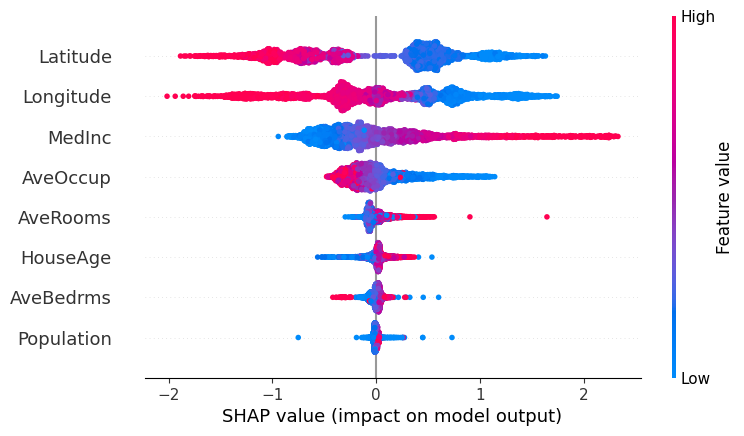

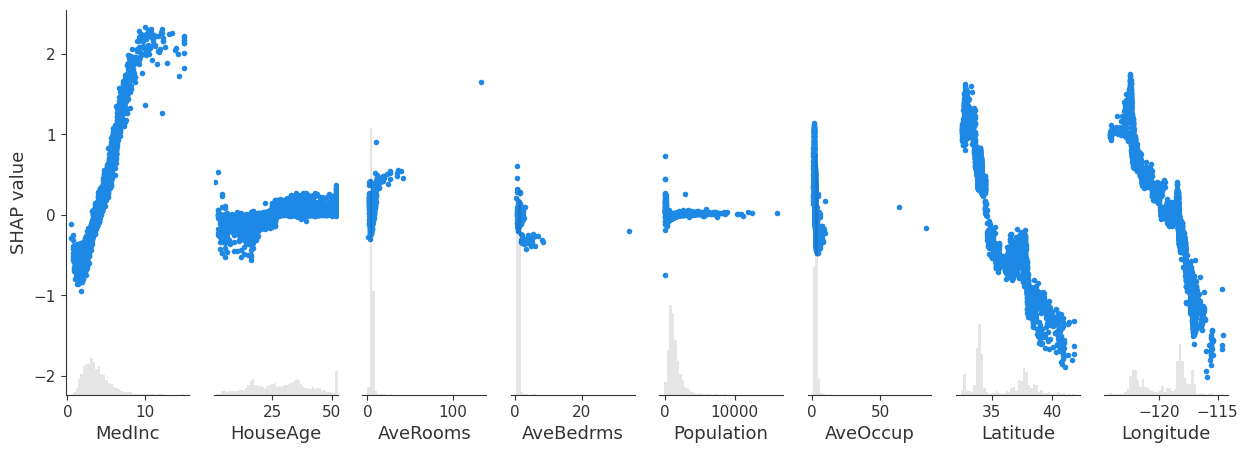

In [11]:
# TODO: WRITE YOUR CODE/ANSWER HERE
print(f"SHAP values shape boosting_model: {shap_values.shape}")
shap.plots.beeswarm(shap_values)
shap.plots.scatter(shap_values)

* 3.1 How does your selected plot visualize shap_values?

    The first plot (beeswarm) showes how a data point (colored dot) for each feature affects the model output from its current prediction. In other words, how much it each datapoint tries to drag the predtcion away from its current state. 

    The second plot shows the distance and sharp-value each data point are distributed in relation to each feature.  

* 3.2 Which features are important and which are not?

    The important features in relation to sharp is the ones with large spread, i.e: Latitude, Longitude and MedInc (to some extent AveOccup). An even spread of SHAP values in both directions (positive and negative) generally indicates that the feature is more important. This spread shows that the feature significantly influences the predictions in both directions, affecting the model's output variably based on its value. 

    Hence: AveRooms, AveBedrms, HouseAge and Population ar less important features

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

    Yes, Population and AveRooms show non-monotonic patterns, where SHAP values vary inconsistently with the feature values. HouseAge and AveBedrms also display a scattered pattern without a clear monotonic trend, although this may be due to limitations in the dataset. MedInc, Latitude, and Longitude shows a more monotonic relationships, where SHAP values generally increase or decrease consistently with the feature values.

### **[STORY]** Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

**STUDENT ANSWER:**

In [15]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)

# (hint: use the explainer from earlier)
# TODO: WRITE YOUR CODE HERE

base1_pred = boosting_model.predict(base1)
base2_pred = boosting_model.predict(base2)
print(f"Prediction for base1: {base1_pred[0]}")
print(f"Prediction for base2: {base2_pred[0]}")


Prediction for base1: 3.137355771791832
Prediction for base2: 2.8604602616966193


#### Base 1 has the higher prediction

SHAP Waterfall Plot for base1:


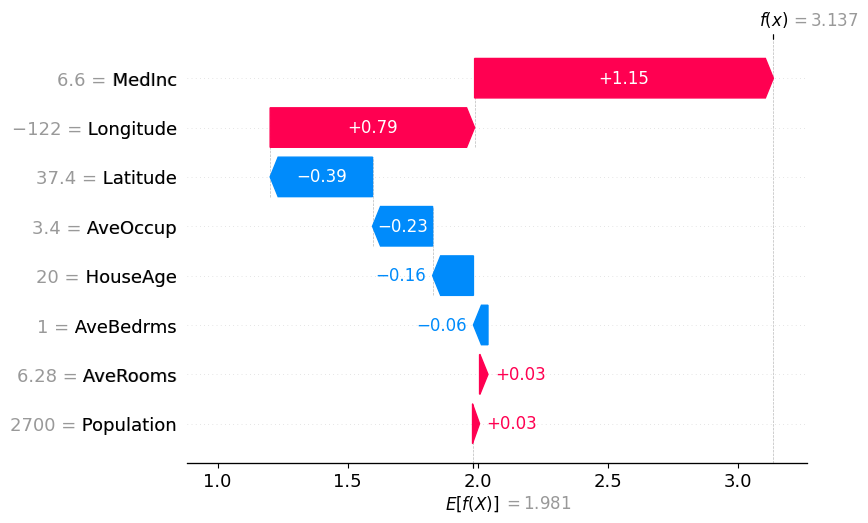

SHAP Waterfall Plot for base2:


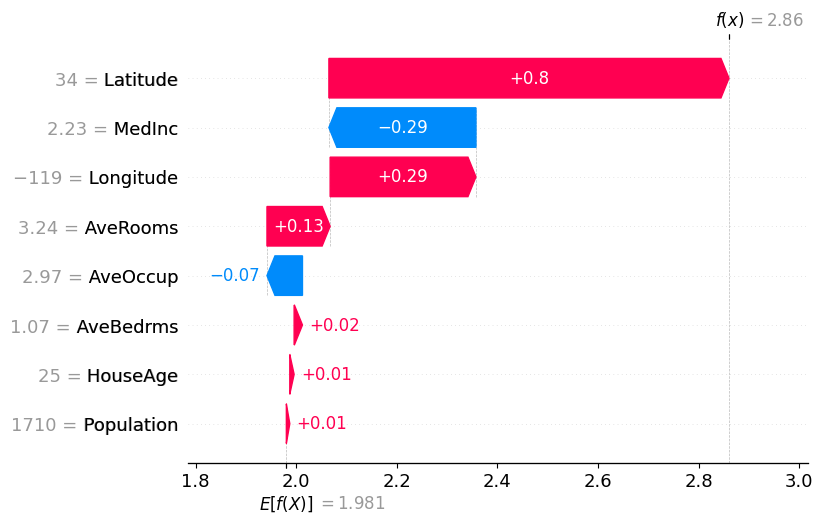

In [17]:
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values_b1 = explainer(base1)
shap_values_b2 = explainer(base2)

print("SHAP Waterfall Plot for base1:")
shap.plots.waterfall(shap_values_b1[0])

# Plot SHAP waterfall plot for base2
print("SHAP Waterfall Plot for base2:")
shap.plots.waterfall(shap_values_b2[0])

In [18]:
b1_no_medInc = base1.copy()
b2_no_medInc = base2.copy()
b1_no_medInc['MedInc'] = X_train['MedInc'].median()
b2_no_medInc['MedInc'] = X_train['MedInc'].median()

upd_base1_pred = boosting_model.predict(b1_no_medInc)
upd_base2_pred = boosting_model.predict(b2_no_medInc)
print(f"Prediction for base1: {upd_base1_pred[0]}")
print(f"Prediction for base2: {upd_base2_pred[0]}")

Prediction for base1: 2.003515129640233
Prediction for base2: 2.578623231626757


#### Base 2 now has the highest prediction

## **Mission Part 2:** 🛡️ Reveal SkyNet's trap


### **[STORY]** While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]** Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

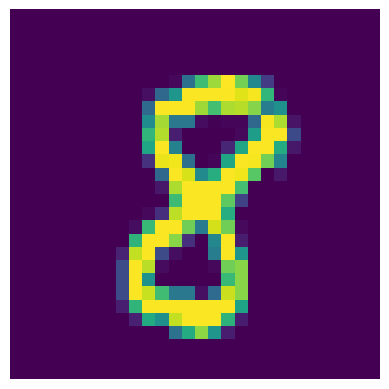

In [4]:
# Download MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Images are originally 1d: reshape back to 28x28.
plt.imshow(X_train[1337].reshape(28, 28))
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [5]:
# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train a neural network

In [6]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    # Returns logits
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Returns class prediction
    def forward_digit(self, x):
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
# Pretty heavy regularization, but results in less noise in SHAP values
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01)

# Train the model
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9094
Epoch 2/10, Test Accuracy: 0.9251
Epoch 3/10, Test Accuracy: 0.9305
Epoch 4/10, Test Accuracy: 0.9382
Epoch 5/10, Test Accuracy: 0.9369
Epoch 6/10, Test Accuracy: 0.9387
Epoch 7/10, Test Accuracy: 0.9420
Epoch 8/10, Test Accuracy: 0.9428
Epoch 9/10, Test Accuracy: 0.9425
Epoch 10/10, Test Accuracy: 0.9385


### Check out some predictions

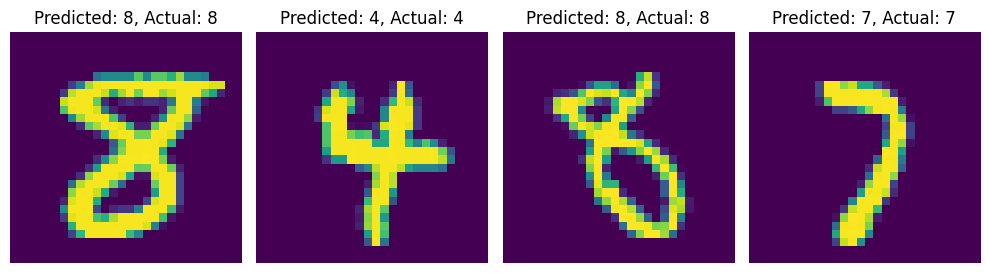

In [7]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### SHAP setup

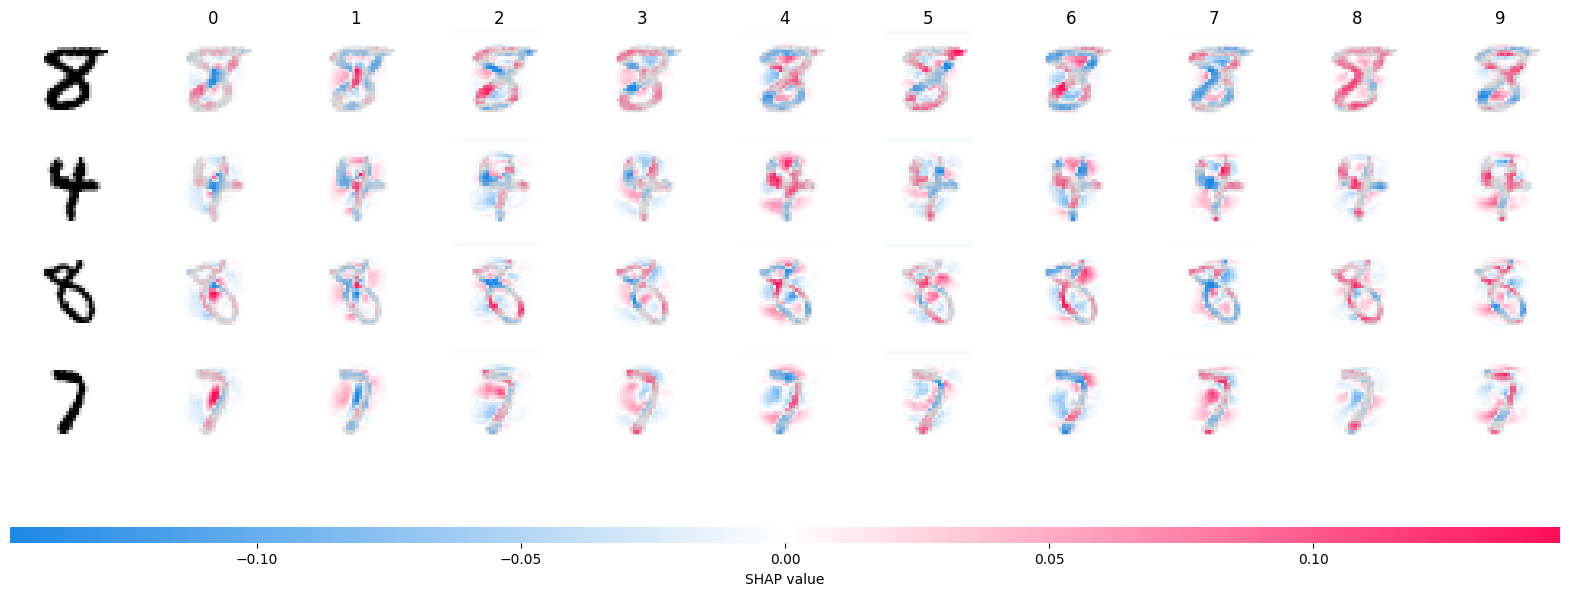

In [8]:
# Create explainer with 1000 random samples as reference data
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample
# You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    # MLP expects a batch channel
    if data.ndim == 1:
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    # Calculate SHAP values for the provided data
    shap_values = explainer.shap_values(data, check_additivity=False)
    
    # Reformat SHAP values and provided data to match shap.image_plot format
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1)
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    
    # Add digit labels to the SHAP plot
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
        
    # Make the SHAP plot!
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels))
    
# Example usage explaining the first 4 samples in the test set
explain_data(X_test[:4])

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?

* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

* 5.3 Why is this not a model agnostic explanation method?

* 5.4 Which digit has the largest probability for **encrypted_image**?

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

**STUDENT ANSWER:**

### 5.1: 

For each row, the SHAP values show how different pixels contribute to the model’s decision for each digit class. Red pixels highlight areas that support the model’s belief that the image represents a particular digit, while blue pixels indicate areas that contradict that belief. Color intensity represents the magnitude of influence, with darker colors indicating a stronger impact.

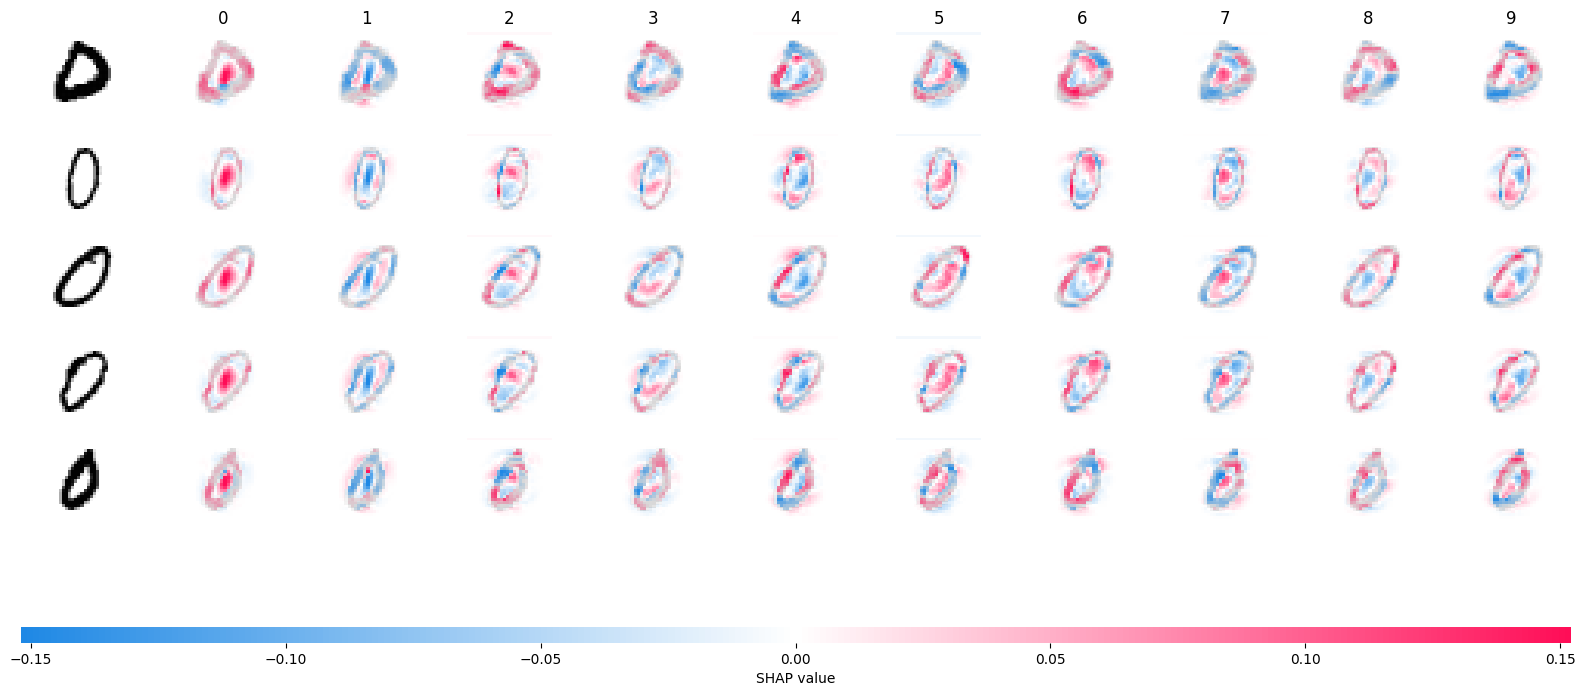

In [11]:
# (hint: use softmax to get the probabilities from the logits)
# TODO: WRITE YOUR CODE/ANSWER HERE

zero_samples = X_test[y_test == 0]
explain_data(zero_samples[:5])

### 5.2:

The model has learned to look for the void in the center as a clear feature that support the model's belief. For other digits (like 1, 2, 3), blue pixels appear around the outer edges, these features reduce the model’s confidence in those classes. The model identifies the rounded shape of “0” and ignores or penalizes areas that might introduce confusion with other digits.

### 5.3:

Since we are using the DeepExplainer method in the SHAP setup (explainer = shap.DeepExplainer(MLP_model, background_data)), we have made assumption of the ML model. By this assumption we cannot longer claim that the SHAP method is model agnostic.

In [22]:
print(f"encrypted_image.shape: {encrypted_image.shape}")
print(f"encrypted_image.dtype: {encrypted_image.dtype}")

encrypted_image.shape: torch.Size([784])
encrypted_image.dtype: torch.float32


### 5.4

In [26]:
# Re-normalize the first 28 pixels
encrypted_image = encrypted_image.view(1, -1)
logits = MLP_model(encrypted_image)
prob = torch.softmax(logits, dim=1)
print(prob)
pred_digit = torch.argmax(prob, dim=1).item()

print(f"The digit with the highest probability is: {pred_digit}")

tensor([[2.9207e-04, 1.4538e-02, 9.3050e-01, 2.2014e-02, 1.1952e-04, 2.0484e-04,
         6.9342e-04, 2.2119e-02, 9.2088e-03, 3.1498e-04]],
       grad_fn=<SoftmaxBackward0>)
The digit with the highest probability is: 2


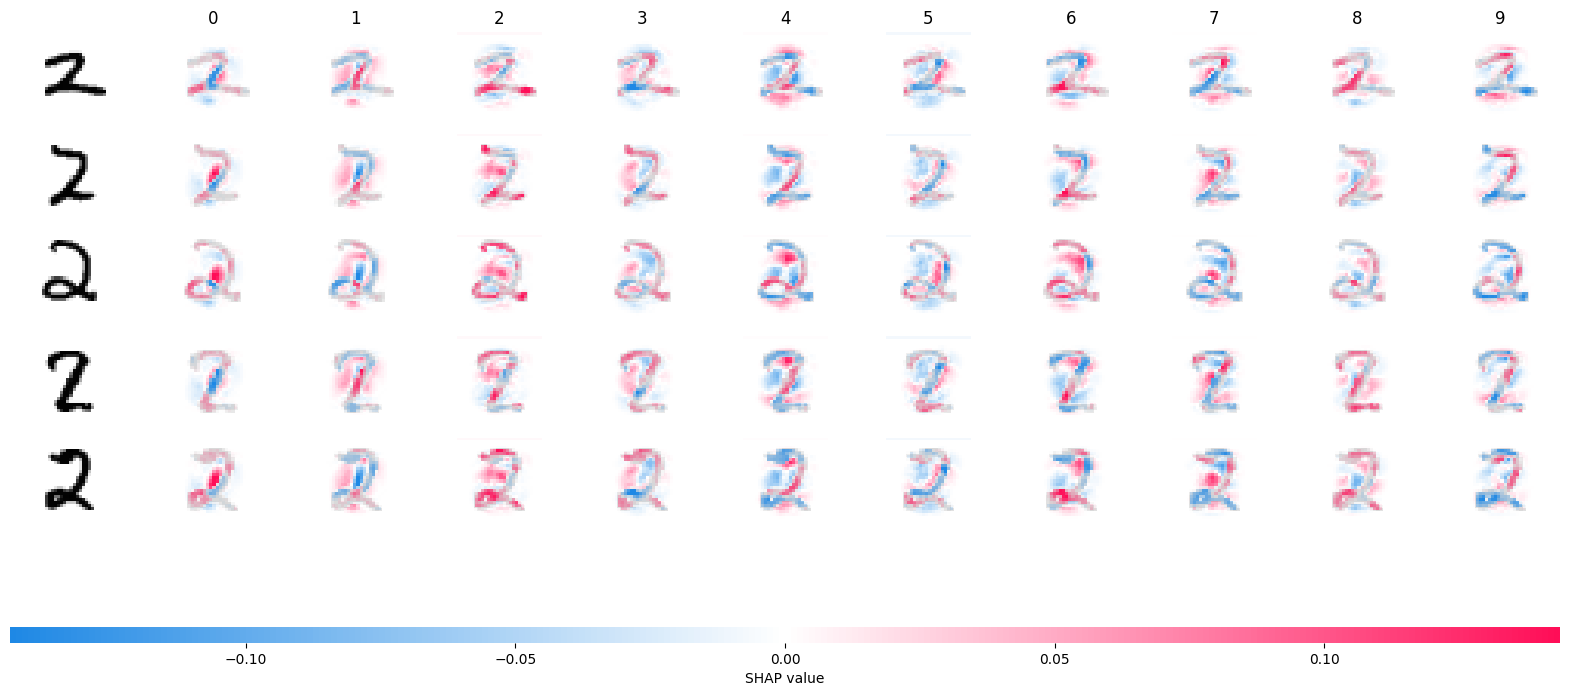

In [27]:
two_samples = X_test[y_test == 2]
explain_data(two_samples[:5])

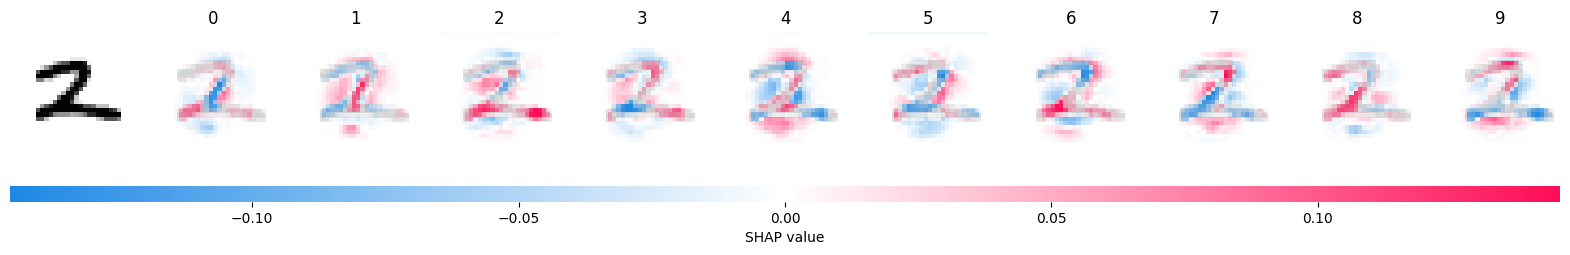

In [28]:
explain_data(encrypted_image)

### 5.5

The model is confident based on the high SHAP values that pulls against that feature and repells from others. The model’s correct prediction despite the altered pixels suggests it is robust to certain types of noise or perturbations in the input data. SHAP values indicate that the model bases its predictions on significant and relevant features of the digits.